In [1]:
import pickle
import numpy as np

f=open("/media/maria/DATA/BrainObservatoryProcessedData/openai_clip-vit-base-patch32_embeddings.pkl",'rb')
currents=pickle.load(f)['natural_movie_one']
mn=np.min(currents)
print(mn)
currents=currents+(-mn)
print(np.max(currents))

-12.493422508239746
17.570687294006348


In [2]:
currents.shape

(900, 768)

In [33]:
from sklearn.decomposition import PCA

pca=PCA(n_components=700)
pcs=pca.fit_transform(currents)

pcs.shape

import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [50]:
from brian2 import *

start_scope()
#stimulus = TimedArray(np.tile([100., 0.], 5)*Hz, dt=100.*ms)
stimulus0=TimedArray(currents[:1000,0]*Hz, dt=10.*ms)
stimulus1=TimedArray(currents[:1000,1]*Hz, dt=10.*ms)
P0 = PoissonGroup(700, rates='stimulus0(t)' , dt=10*ms)
P1 = PoissonGroup(700, rates='stimulus1(t)' , dt=10*ms)

M0 = SpikeMonitor(P0)
#Pop=PopulationRateMonitor(P)
M1 = SpikeMonitor(P1)

run(10000*ms) 

In [55]:
from convenience_functions import bin_spikes
binned_arr0=bin_spikes(M0, 700, 10, 0.01)
binned_arr1=bin_spikes(M1,700,10,0.01)

9.99
999
[ 0.          0.01002004  0.02004008  0.03006012  0.04008016  0.0501002
  0.06012024  0.07014028  0.08016032  0.09018036  0.1002004   0.11022044
  0.12024048  0.13026052  0.14028056  0.1503006   0.16032064  0.17034068
  0.18036072  0.19038076  0.2004008   0.21042084  0.22044088  0.23046092
  0.24048096  0.250501    0.26052104  0.27054108  0.28056112  0.29058116
  0.3006012   0.31062124  0.32064128  0.33066132  0.34068136  0.3507014
  0.36072144  0.37074148  0.38076152  0.39078156  0.4008016   0.41082164
  0.42084168  0.43086172  0.44088176  0.4509018   0.46092184  0.47094188
  0.48096192  0.49098196  0.501002    0.51102204  0.52104208  0.53106212
  0.54108216  0.5511022   0.56112224  0.57114228  0.58116232  0.59118236
  0.6012024   0.61122244  0.62124248  0.63126253  0.64128257  0.65130261
  0.66132265  0.67134269  0.68136273  0.69138277  0.70140281  0.71142285
  0.72144289  0.73146293  0.74148297  0.75150301  0.76152305  0.77154309
  0.78156313  0.79158317  0.80160321  0.8116

In [56]:
print(binned_arr0.shape)
new_arr=np.vstack((binned_arr0,binned_arr1))
print(new_arr.shape)

(700, 998)
(1400, 998)


In [37]:
import matplotlib.pyplot as plt
%matplotlib qt
pca=PCA(n_components=90)
pcs=pca.fit_transform(new_arr.T)
# Create a 3D PCA plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot features for natural movie sequence
ax.scatter(
    pcs[:, 0],
    pcs[:, 1],
    pcs[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [38]:
new_arr.shape

(14000, 98)

In [32]:
plt.plot(pcs[:,0])

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [39]:
print(pca.explained_variance_ratio_)

[0.02093959 0.01605994 0.01545954 0.01526538 0.01469454 0.01457086
 0.01447323 0.01424712 0.01409327 0.01389851 0.01371797 0.01357677
 0.01347634 0.01327876 0.01326648 0.0131473  0.01301164 0.01295393
 0.01286223 0.01277925 0.01271557 0.01256381 0.01243646 0.0123582
 0.01230384 0.01214289 0.01204851 0.01195487 0.01191587 0.01181117
 0.01176595 0.01167651 0.01159846 0.01145625 0.01136055 0.01132593
 0.01124596 0.01115183 0.01105313 0.01097744 0.0107608  0.01068061
 0.0106527  0.01059468 0.01049824 0.01036345 0.01031984 0.01021017
 0.01013037 0.01009923 0.0099896  0.00990804 0.00987371 0.00975775
 0.00974105 0.00957287 0.00954877 0.00948864 0.00942047 0.00932337
 0.00929132 0.00920846 0.00914819 0.00909343 0.00897626 0.0089094
 0.00883885 0.0087879  0.00870485 0.0085291  0.00847249 0.00845306
 0.00833435 0.00827764 0.00815028 0.0081318  0.00793817 0.00783605
 0.00768868 0.00762208 0.00751895 0.00736544 0.0072968  0.00719631
 0.0069603  0.00685924 0.00676113 0.00667575 0.00641849 0.006366

In [40]:
print(pca.explained_variance_)

[11.22072591  8.60590981  8.28417657  8.18013584  7.87424623  7.80797105
  7.75565189  7.63448611  7.55204784  7.44768015  7.35093563  7.27527254
  7.22145734  7.11557916  7.10899866  7.04513473  6.9724405   6.94151955
  6.89237766  6.84791367  6.81378739  6.73246924  6.66422459  6.62229085
  6.59315895  6.50691013  6.45633979  6.40615773  6.38526229  6.32915651
  6.30492487  6.25699864  6.21517351  6.13896946  6.08768548  6.06913582
  6.02628284  5.97583901  5.922953    5.88238945  5.7663012   5.72333392
  5.70837375  5.67728549  5.62560657  5.55337725  5.53000825  5.47123912
  5.42847993  5.41179297  5.35304461  5.30934233  5.29094466  5.22880793
  5.21985737  5.12973427  5.11681953  5.08460079  5.04807183  4.99603756
  4.97886251  4.93446195  4.90216406  4.87282076  4.81003777  4.77421018
  4.73640091  4.70909937  4.66459814  4.57042109  4.54008662  4.52967017
  4.46606051  4.43567129  4.36742608  4.35752212  4.25376209  4.19904195
  4.12007108  4.08438068  4.02911795  3.9468599   3

In [11]:
print(binned_arr0)

[[0 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


pos: -0.9973 neg:  6.2712 total:  5.2739 temperature:  1.0000: 100%|██████████| 5000/5000 [05:34<00:00, 14.95it/s]


<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

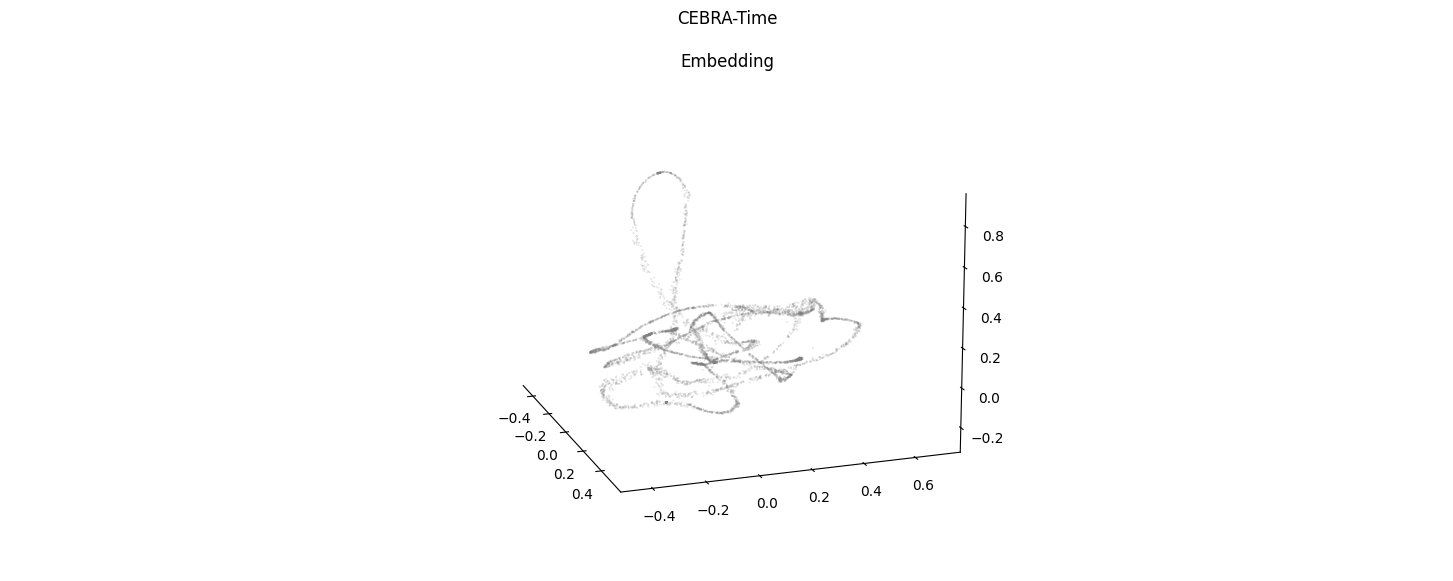

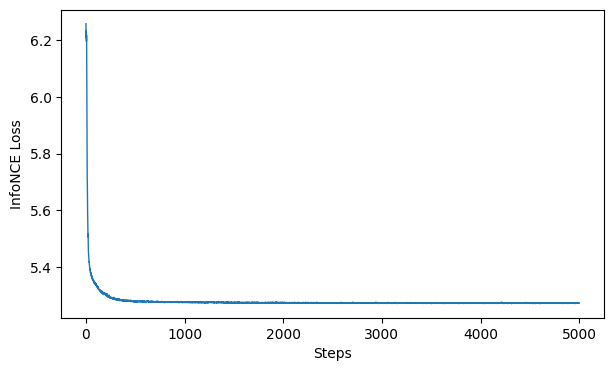

In [57]:
import os

import cebra
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cebra import CEBRA

%matplotlib inline

# alter the number of max_iterations to get a faster runtime
max_iterations = 5000 # default is 5000
# set conditional to 'time'
cebra_time_model = CEBRA(model_architecture="offset10-model",
                        batch_size=512,
                        learning_rate=1e-2,
                        temperature=1,
                        output_dimension=16,
                        num_hidden_units=128,
                        max_iterations=max_iterations,
                        distance="cosine",
                        conditional="time",
                        device="cuda_if_available",
                        verbose=True,
                        time_offsets=10)
# insert the data you want to train in .fit()
cebra_time_model.fit(new_arr.T)
cebra.plot_loss(cebra_time_model, color = "tab:blue")

In [63]:
cebra_time = cebra_time_model.transform(new_arr.T)
%matplotlib qt
fig = plt.figure(figsize=(20, 7))

plt.title(f"CEBRA-Time")
plt.gca().axis("off")
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax = cebra.plot_embedding(ax=ax, embedding=cebra_time)



In [60]:
cebra_time.shape

(998, 16)

In [66]:
import matplotlib.pyplot as plt
%matplotlib qt
#pca=PCA(n_components=90)
#pcs=pca.fit_transform(cebra_time.T)
# Create a 3D PCA plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot features for natural movie sequence
ax.scatter(
    cebra_time[:, 0],
    cebra_time[:, 1],
    cebra_time[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
